In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import interface as itf
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt

In [136]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(30,8)})

In [43]:
all_dfs = []
for pid in range(1, 17):
    if pid == 12:
        df2 = itf.get_maminutes(pid)
        df3 = itf.get_vaminutes(pid)
        df4 = itf.get_sedminutes(pid)
        df_sleep = itf.get_sleep(pid)
        df_sleep['dateTime'] = pd.to_datetime(df_sleep['dateOfSleep'])
        df_sleepscore = itf.get_sleepscore(pid)
        df_sleepscore['dateTime'] = pd.to_datetime(pd.to_datetime(df_sleepscore['timestamp']).dt.date)


        df_comb = df2.merge(
            df3, on='dateTime'
        ).merge(
            df4, on='dateTime'
        ).merge(
            df_sleep, on='dateTime'
        ).merge(
            df_sleepscore, on='dateTime'
        )
    elif pid == 13:
        df1 = itf.get_laminutes(pid)
        df2 = itf.get_maminutes(pid)
        df3 = itf.get_vaminutes(pid)
        df4 = itf.get_sedminutes(pid)
        df_sleep = itf.get_sleep(pid)
        df_sleep['dateTime'] = pd.to_datetime(df_sleep['dateOfSleep'])
        df_sleepscore = itf.get_sleepscore(pid)
        df_sleepscore['dateTime'] = pd.to_datetime(pd.to_datetime(df_sleepscore['timestamp']).dt.date)


        df_comb = df1.merge(
            df2, on='dateTime'
        ).merge(
            df3, on='dateTime'
        ).merge(
            df4, on='dateTime'
        ).merge(
            df_sleep, on='dateTime'
        ).merge(
            df_sleepscore, on='dateTime'
        )
    else:
        df1 = itf.get_laminutes(pid)
        df2 = itf.get_maminutes(pid)
        df3 = itf.get_vaminutes(pid)
        df4 = itf.get_sedminutes(pid)
        df5 = itf.get_resthr(pid)
        df_sleep = itf.get_sleep(pid)
        df_sleep['dateTime'] = pd.to_datetime(df_sleep['dateOfSleep'])
        df_sleepscore = itf.get_sleepscore(pid)
        df_sleepscore['dateTime'] = pd.to_datetime(pd.to_datetime(df_sleepscore['timestamp']).dt.date)
        
    

        df_comb = df1.merge(
            df2, on='dateTime'
        ).merge(
            df3, on='dateTime'
        ).merge(
            df4, on='dateTime'
        ).merge(
            df5, on='dateTime'
        ).merge(
            df_sleep, on='dateTime'
        ).merge(
            df_sleepscore, on='dateTime'
        )
        
    agg_functions = ['max','min','mean','median','std', 'sum']

    df_hr = itf.get_hr(pid)
    df_hr['dateTime'] = pd.to_datetime(df_hr['dateTime'].dt.date)
    df_hr = df_hr.groupby('dateTime')['bpm'].agg(agg_functions).reset_index().rename(columns={f:'hr_'+f for f in agg_functions})

    df_cal = itf.get_calories(pid)
    df_cal['dateTime'] = pd.to_datetime(df_cal['dateTime'].dt.date)
    df_cal = df_cal.groupby('dateTime')['calories'].agg(agg_functions).reset_index().rename(columns={f:'cal_'+f for f in agg_functions})

    df_dist = itf.get_distance(pid)
    df_dist['dateTime'] = pd.to_datetime(df_dist['dateTime'].dt.date)
    df_dist = df_dist.groupby('dateTime')['distance'].agg(agg_functions).reset_index().rename(columns={f:'dist_'+f for f in agg_functions})

    df_steps = itf.get_steps(pid)
    df_steps['dateTime'] = pd.to_datetime(df_steps['dateTime'].dt.date)
    df_steps = df_steps.groupby('dateTime')['steps'].agg(agg_functions).reset_index().rename(columns={f:'steps_'+f for f in agg_functions})
        
    df_comb = df_comb.merge(
            df_hr, on='dateTime'
        ).merge(
            df_cal, on='dateTime'
        ).merge(
            df_dist, on='dateTime'
        ).merge(
            df_steps, on='dateTime'
        )
        
    df_final = df_comb.assign(pid=pid)
    all_dfs.append(df_final)
    print(pid)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [44]:
df_out = pd.concat(all_dfs, axis=0, ignore_index=True)

In [46]:
df_out.to_csv('new_data/day_data.csv',index=False)

In [3]:
df = itf.get_hr(1)

In [4]:
print(df.head())

             dateTime  bpm
0 2019-11-01 00:00:05   54
1 2019-11-01 00:00:10   52
2 2019-11-01 00:00:20   51
3 2019-11-01 00:00:25   52
4 2019-11-01 00:00:30   51


In [49]:
df['dateHour'] = df['dateTime'].apply(lambda x: x.replace(minute=0, second=0))

In [50]:
df_reduced = df.groupby('dateHour').mean()

In [55]:
df_reduced['bpm_smooth'] = signal.savgol_filter(df_reduced['bpm'], window_length=35, polyorder=3)

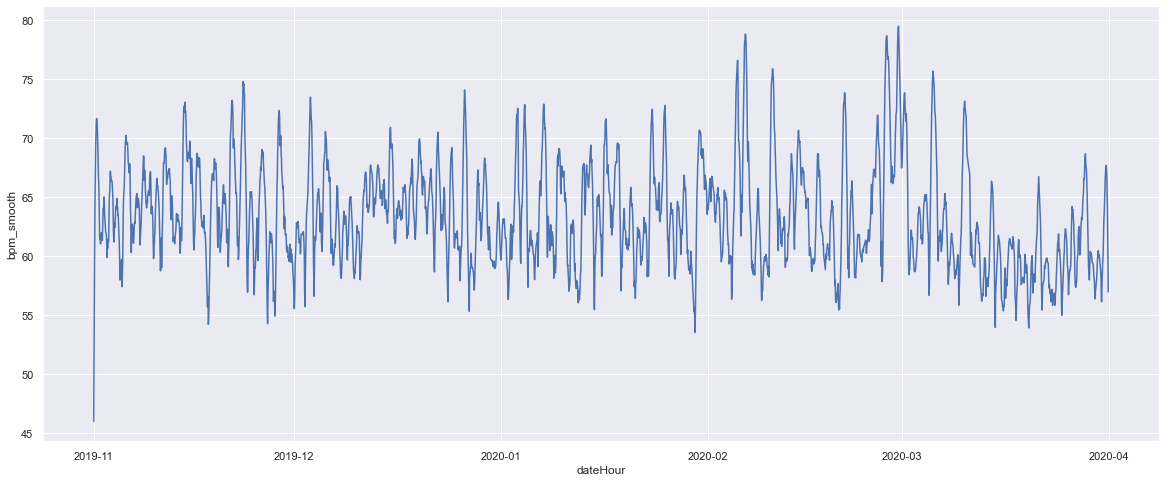

In [60]:
g = sns.lineplot(data=df_reduced,  x='dateHour', y='bpm_smooth')

In [129]:
df['quant'] = df['dateTime'].dt.round('30min').dt.strftime("%H%M")

In [130]:
df_by_hour = df.groupby('quant').mean().reset_index()

C:\Users\jason\anaconda3\envs\aggies4health\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


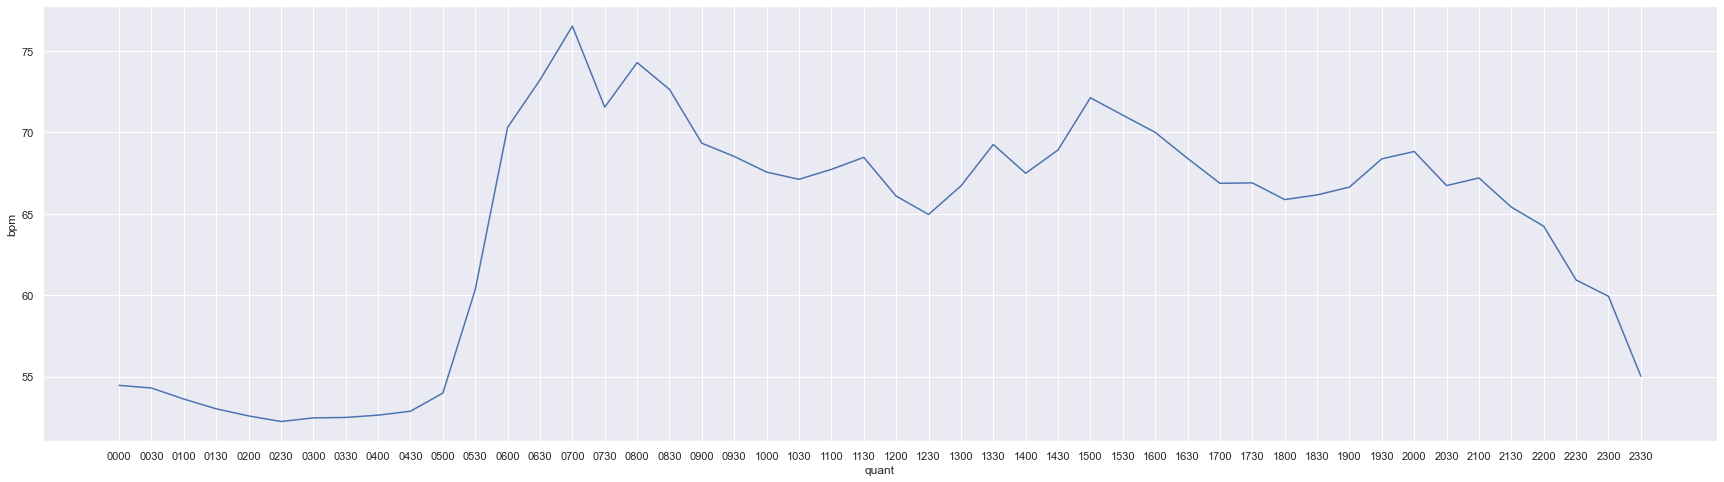

In [133]:
g = sns.lineplot(df_by_hour['quant'], df_by_hour['bpm'])

In [152]:
df1 = itf.get_calories(1)
df2 = itf.get_distance(1)
df3 = itf.get_steps(1)

In [149]:
df1 = df1.rename({"value":"calories"})
df2 = df2.rename({"value":"distance"})
df3 = df3.rename({"value":"steps"})

In [153]:
df_comb = df1.merge(df2, on='dateTime').merge(df3, on='dateTime')

In [158]:
df_hr = itf.get_hr(1)

In [161]:
df_hr['dateMinute'] = df_hr['dateTime'].apply(lambda x:x.replace(second=0))

In [167]:
df_hr_min = df_hr.groupby('dateMinute')['bpm'].agg(['max','min','mean','median', 'std']).reset_index()

In [168]:
df_final = df_comb.merge(df_hr_min.rename(columns={'dateMinute':'dateTime'}), on='dateTime')

In [170]:
df_out = df_final.rename(columns={'max':'hr_max', 'min':'hr_min', 'mean':'hr_mean', 'median':'hr_median', 'std':'hr_std'})

In [171]:
df_out.to_csv('minute_data.csv', index=False)